# Visualizing FDA Data 

In this example we use the openFDA API to get information about drug side effects.  We want to compare side effects between different drugs.  We will show 4 different graphs.

Few categories (compare 2 or 3 drugs) 

- **Few items (compare 3 drugs for 2 side effects) create a column chart**
- **Many items (compare 2 drugs for many side effects) create a bar chart**

Many categories 

- **In this example we will create a table of embedded charts to compare side effects between many drugs**
- **We use a variable width column chart to compare side effects between a few drugs (4 or 5)**

#### Objectives

* **use an API to retrieve data**
* **define small functions that we can re-use**
* **select the appropriate chart depending on how many items and categories we have**
* **use matplotlib to create the charts**

As usual we import libraries that we will use and we tell the notebook to create the plots inline. 

In [1]:
import json as js
import urllib2 as ulib
import json
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import pandas as pd

#%matplotlib inline   

Now we use the openFDA api to get drug data.   

* First we define a request string following the documentation on the openFDA site (https://open.fda.gov/api/reference/).  Note that most of the request string is static.  However the drugname is passed in as a parameter. 
* We use urlib2 to open the url and get the response
* We use simplejson to load the response as a json object.

In [6]:
# form a request
request_string='https://api.fda.gov/drug/event.json?search=patient.drug.medicinalproduct:aspirin&count=patient.reaction.reactionmeddrapt.exact'

import ssl

# This restores the same behavior as before.
context = ssl._create_unverified_context()
response=ulib.urlopen(request_string,context=context)

print response

# load as json
fda_data=json.load(response)

print fda_data

<addinfourl at 140511086525904 whose fp = <socket._fileobject object at 0x7fcb496a75d0>>
{u'meta': {u'last_updated': u'2016-03-25', u'license': u'http://open.fda.gov/license', u'disclaimer': u'openFDA is a beta research project and not for clinical use. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated.'}, u'results': [{u'count': 12349, u'term': u'DYSPNOEA'}, {u'count': 12061, u'term': u'NAUSEA'}, {u'count': 10734, u'term': u'DIZZINESS'}, {u'count': 10652, u'term': u'FATIGUE'}, {u'count': 10491, u'term': u'FLUSHING'}, {u'count': 9311, u'term': u'DIARRHOEA'}, {u'count': 9058, u'term': u'DRUG INEFFECTIVE'}, {u'count': 8473, u'term': u'MYOCARDIAL INFARCTION'}, {u'count': 8412, u'term': u'ASTHENIA'}, {u'count': 8189, u'term': u'HEADACHE'}, {u'count': 7313, u'term': u'FALL'}, {u'count': 7279, u'term': u'PAIN'}, {u'count': 7194, u'term': u'VOMITING'}, {u'count': 7071, u'term': u'PRURITUS'}, {u'count': 6896, u'term': u'CHEST PAIN'}, {u'c

It is useful to take a look at the type of the result.  

In [7]:
print type(fda_data)

#print fda_data

<type 'dict'>


It should be a dictionary. So it will also be useful to take a look at the keys

In [8]:
fda_df=pd.DataFrame(fda_data['results'])

print fda_df.head()

   count       term
0  12349   DYSPNOEA
1  12061     NAUSEA
2  10734  DIZZINESS
3  10652    FATIGUE
4  10491   FLUSHING


Now that we know a little bit about our data we put that knowledge to use by writing a function that we can re-use.  The function forms a request string using a 'drugname' that is passed in as a variable.  It then opens the url and uses simplejson to load the response.  We return only the 'results' part wrapped into a Pandas Dataframe.   

In [11]:
def get_drug_adverse_event_data(drugname):
    # form a request
    request_string='https://api.fda.gov/drug/event.json?search=patient.drug.medicinalproduct:'+drugname+'&count=patient.reaction.reactionmeddrapt.exact'
    
    response=ulib.urlopen(request_string,context=context)
    
    # load as json
    fda_data=json.load(response)
    
    # return the results
    return pd.DataFrame(fda_data['results'])

We also define a function that will return the event count for an adverse event.   To determine the adverse event count we need to retrieve the `count` for a specific `term` (remember `term` is the name of the adverse event).  We end up using an `itemgetter` to retrieve a list of terms.  Then we find the index where the term of interest is located.  Then we use the index to get the count.  This is all done concisely in a couple of lines of code.  The commented out section is a scratch pad where we experimented with the components that we used to write `get_event_count`.  

So now that we have a function that returns a list of adverse events for a specific drug let's use it to get information about two different drugs. 

In [25]:
drugname1='aspirin'
drugname2='tylenol'
#drugname1='zoloft'
#drugname2='paxil'

drug_df1=get_drug_adverse_event_data(drugname1)
drug_df2=get_drug_adverse_event_data(drugname2)

print drug_df1.head()

   count       term
0  12349   DYSPNOEA
1  12061     NAUSEA
2  10734  DIZZINESS
3  10652    FATIGUE
4  10491   FLUSHING


Next, use the 'get_event_count' function to get adverse event accounts for two different types of events. We print out the two lists to make sure the data is in the form we expect.  Each list should contain 2 event counts (2 integers)

In [26]:
event1='NAUSEA'
event2='ANXIETY'

df1= drug_df1[drug_df1.term.isin([event1, event2])]
df2= drug_df2[drug_df2.term.isin([event1, event2])]

print df1

    count     term
1   12061   NAUSEA
35   4331  ANXIETY


Now that we've read the data we can plot it.  We follow this reference: http://matplotlib.org/examples/api/barchart_demo.html. The first step is to define the horizontal indices for the plots.  It's useful to define this as a numpy array so we can perform calculations with it. We define a width that will be used for later calculations. We also get a reference to the axis which is used to place labels and ticks.

We use `plyplot.bar` to draw the plots.  We pass in indexes to plot at, values to plot, width of the bars and the color.  Note that in the second call we add `width` to the index.  Since `ind` was defined as a `numpy` array we can perform mathematical operations on it. 

Finally we add labels, a title, ticks and a legend then show the plot.

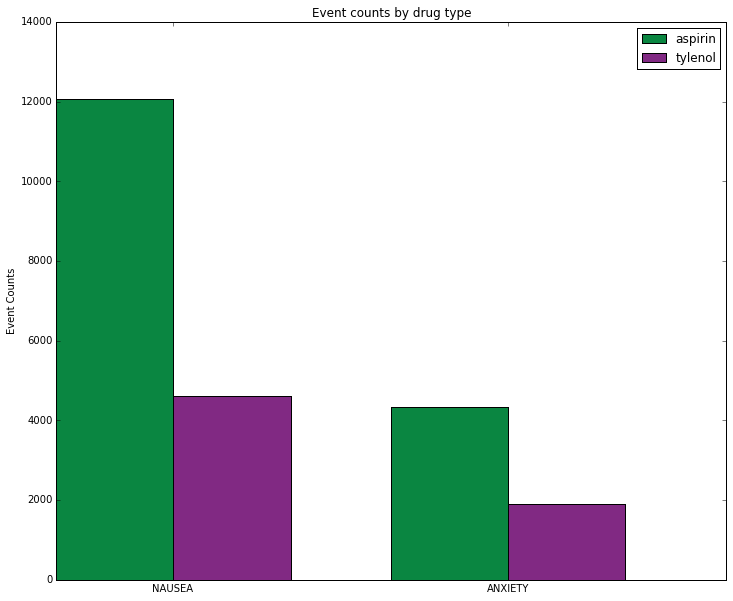

In [27]:
%matplotlib inline

color1='#0a8641'
color2='#812983'

ind=np.asarray([1,2])
width = 0.35 

fig, ax = plt.subplots(figsize=(12,10))

rects1 = plt.bar(ind, df1['count'], width, color=color1)
rects2 = plt.bar(ind+width, df2['count'], width, color=color2)

ax.set_ylabel('Event Counts')
ax.set_title('Event counts by drug type')

ax.set_xticks(ind+width)
ax.set_xticklabels( (event1, event2) )

ax.legend( (rects1[0], rects2[0]), (drugname1, drugname2) )

plt.show()

When we have only a couple of categories but many items per category a horizontal bar plot can be useful. This example shows a plot that compares 2 drugs for many side effects.  

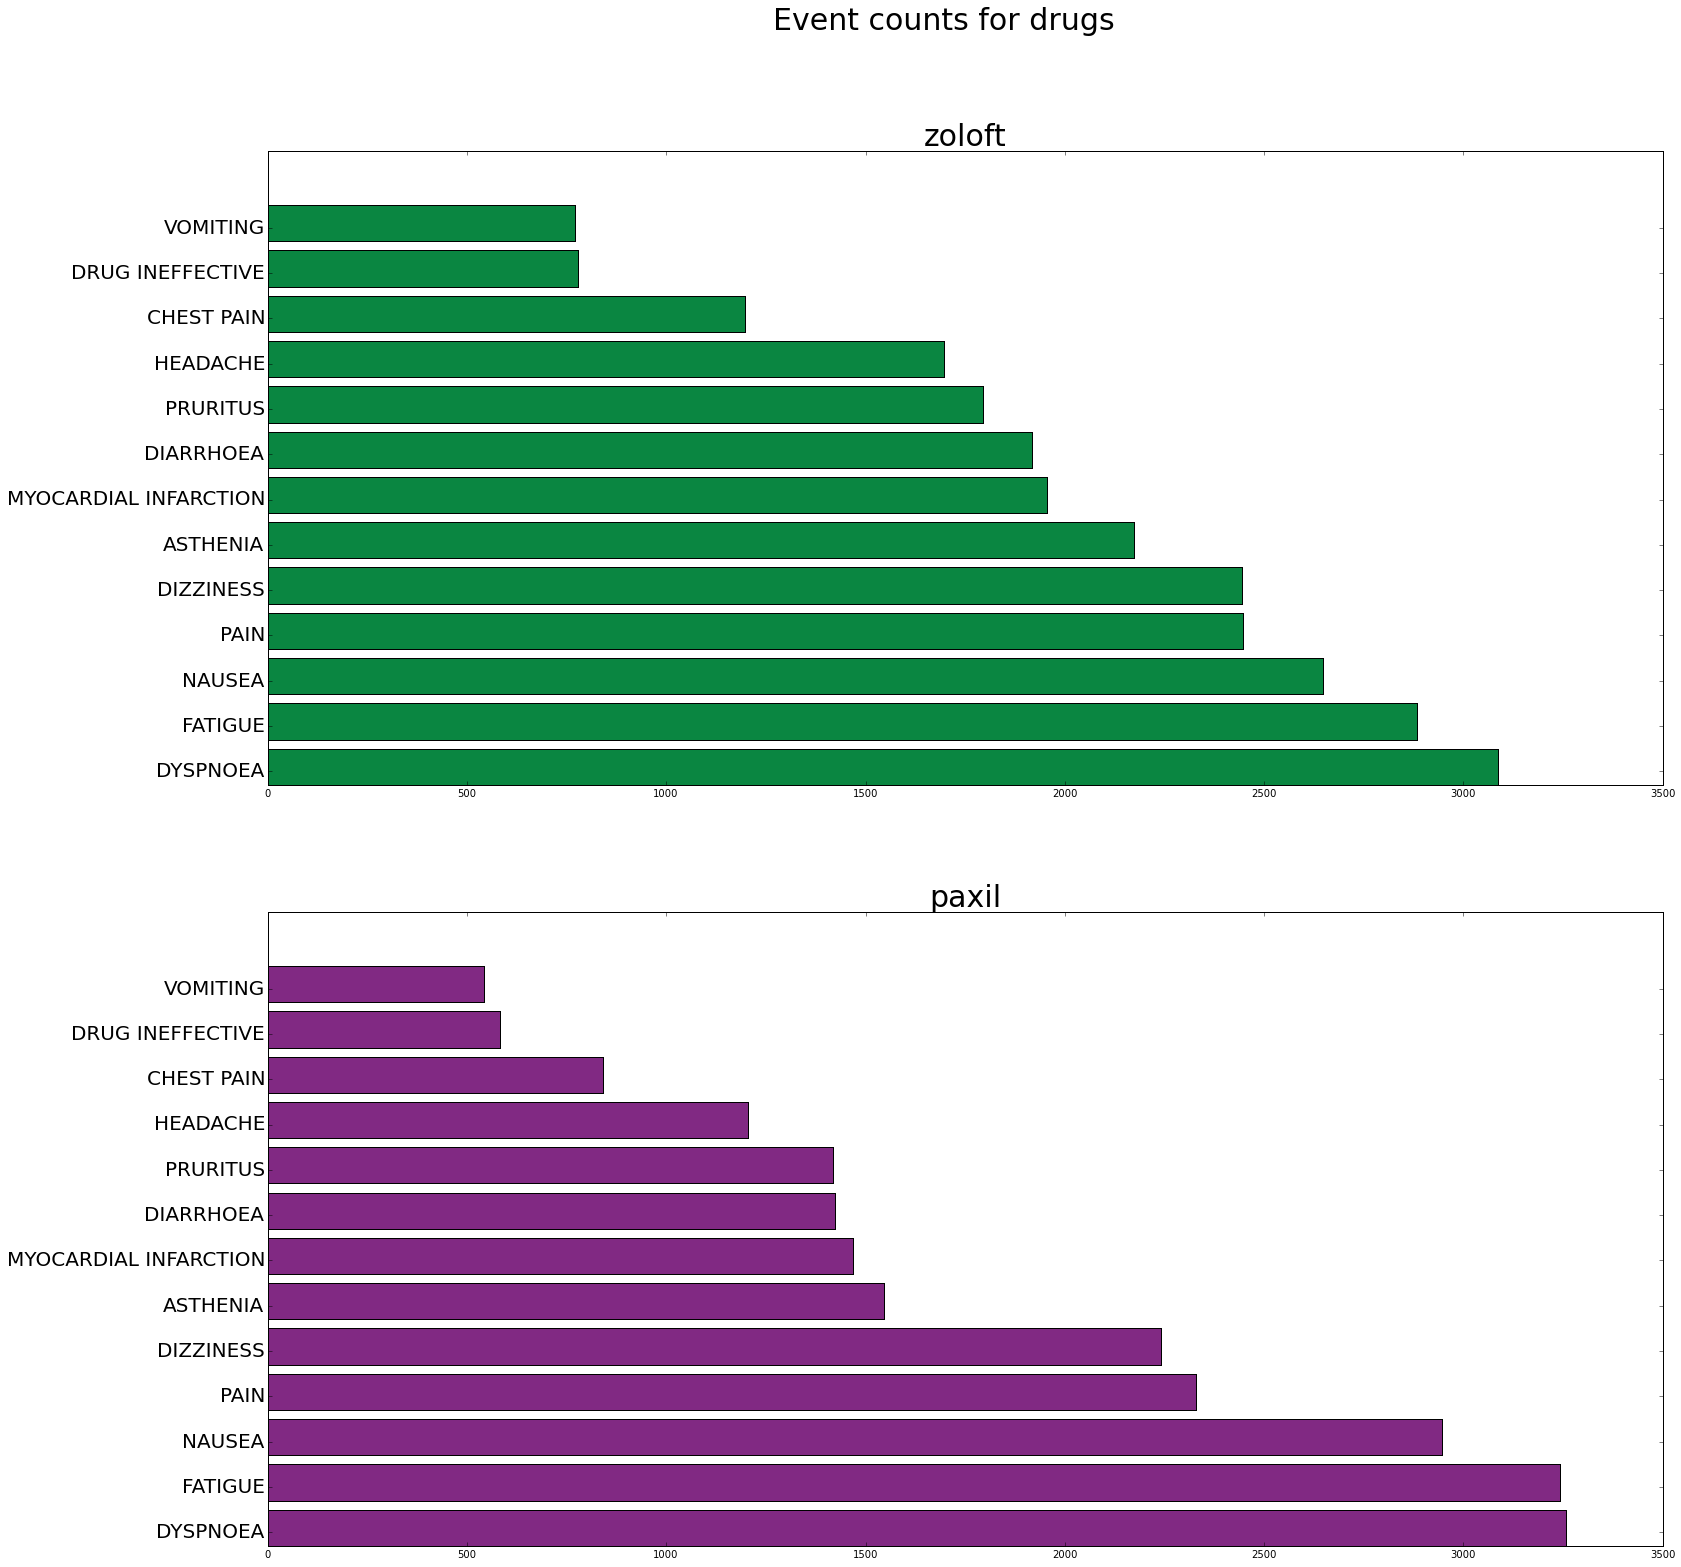

In [15]:
events=['DYSPNOEA', 'FATIGUE', 'NAUSEA', 'PAIN', 'DIZZINESS', \
        'ASTHENIA', 'MYOCARDIAL INFARCTION', 'DIARRHOEA', 'PRURITUS', 'HEADACHE', 'CHEST PAIN', 'DRUG INEFFECTIVE', 'VOMITING']

#DYSPNOEA, DIZZINESS, FATIGUE, ASTHENIA, MYOCARDIAL INFARCTION, DIARRHOEA, PRURITUS, HEADACHE, CHEST PAIN, DRUG INEFFECTIVE, VOMITING, PAIN, FALL

df1= drug_df1[drug_df1.term.isin(events)].reset_index(drop=True)
df2= drug_df2[drug_df2.term.isin(events)].reset_index(drop=True)

ind=df1.index

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,25))

axes[0].barh(ind, df1['count'], color=color1)
axes[0].set_yticks(ind+.3)
axes[0].set_yticklabels(events, fontsize=20)
axes[0].set_title(drugname1, fontsize=30)

axes[1].barh(ind, df2['count'], color=color2)
axes[1].set_yticks(ind+.3)
axes[1].set_yticklabels(events, fontsize=20)
axes[1].set_title(drugname2, fontsize=30)

plt.suptitle('Event counts for drugs', fontsize=30)

plt.show()

This example shows a table with embedded charts to compare many drugs for 2 side effects

ValueError: incompatible sizes: argument 'height' must be length 2 or scalar

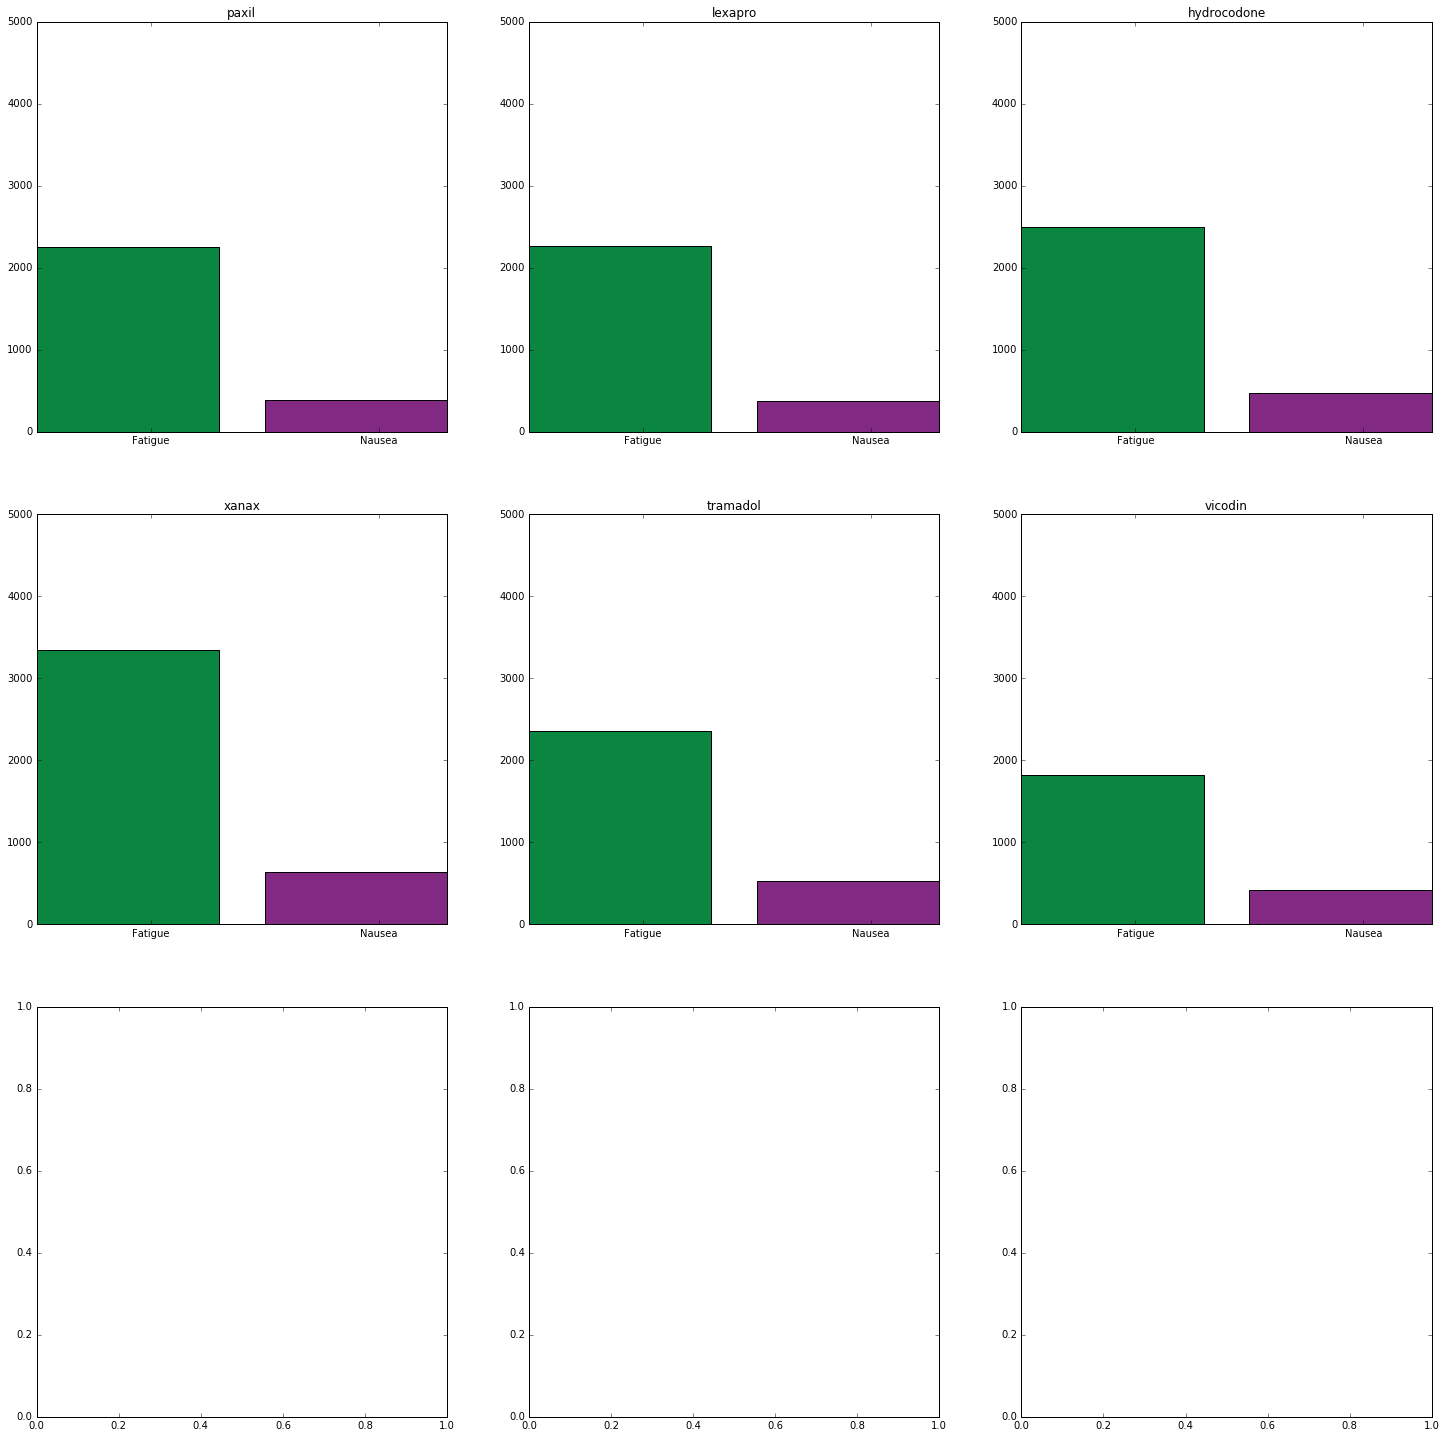

In [17]:
event1='FATIGUE'
event2='CHILLS'

ind=np.asarray([1,2])

drugs=['paxil', 'lexapro', 'hydrocodone', 'xanax', 'tramadol', 'vicodin', 'lyrica', 'oxycodone', 'lisinopril']

plotpos=[331, 332, 333, 334, 335, 336, 337, 338, 339]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,25))

for drug, pos in zip(drugs,plotpos):
    df=get_drug_adverse_event_data(drug)
    df=df[df.term.isin([event1, event2])]
    plt.subplot(pos)
    plt.bar(ind, df['count'], color=[color1, color2])
    ax=plt.gca()
    ax.set_xticks(ind+.5)
    ax.set_xticklabels(['Fatigue','Nausea'])
    ax.set_title(drug)
    plt.ylim([0,5000])
    
    
fig.set_size_inches(10,10)    
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.suptitle('Event counts for drugs', fontsize=20)
plt.show()